### Demonstration of traditional (non-w-projection) gridding

##### Requires:
- ipython
- numpy
- matplotlib
- make_image_standard (crocodle module)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from make_image_standard import GriddingConvolutionFunction, Grid, Image, grid_data, fov_to_cell_size
import time
import os
from read_oskar_vis import OskarBinary, OskarVis

#### Load some visibility data

Time taken = 0.027 s


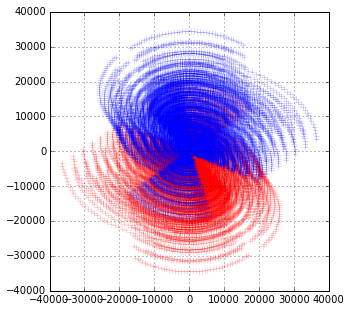

In [38]:
t0 = time.time()
vis_file = '../data_set_2/test_vla.vis'
oskar_vis = OskarVis(vis_file)
uu, vv, ww = oskar_vis.uvw(flatten=True)  # TODO return uvw coordinates triplets rather than arrays.
vis = oskar_vis.amplitudes(flatten=True)
uvw = np.transpose(np.array([uu, vv, ww]))
print 'Time taken = %.3f s' % (time.time() - t0)
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(111, aspect='equal')
plt.plot(-uvw[:, 0], -uvw[:, 1], 'r+', alpha=0.3)
plt.plot(uvw[:, 0], uvw[:, 1], 'b+', alpha=0.3)
plt.grid()

#### Generate a gridding convolution function

Time taken = 0.063 s


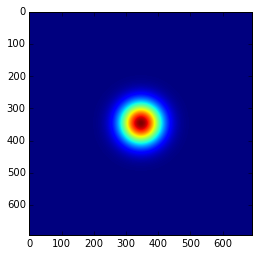

In [47]:
t0 = time.time()
support = 5  # Number of grid pixels = support * 2 + 1
over_sample = 63  # Number of points points per grid cell.
gcf = GriddingConvolutionFunction(support, over_sample)
# gcf.pillbox_2d()
gcf.exponential_2d()
# gcf.sinc_2d()
# gcf.exponential_sinc_2d()
print 'Time taken = %.3f s' % (time.time() - t0)
k = gcf.data
plt.imshow(k)
# plt.imshow(gcf.data)
# gcf.plot()

#### Gridding

cell size uv m 201.430474851
(15093, 3) (15093,)
g_sum =  94832.1703179
Time taken = 17.454 s


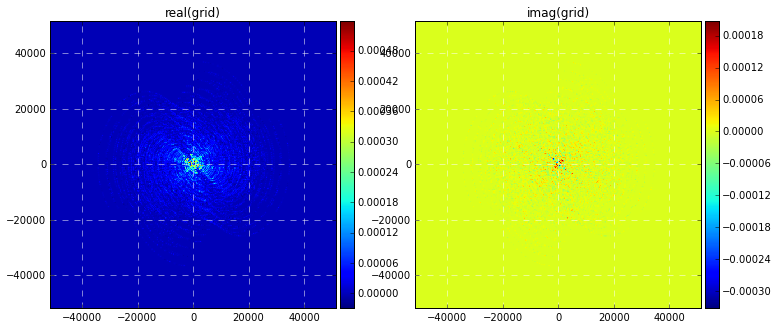

In [48]:
t0 = time.time()
im_size = 512
# cell_size_lm = fov_to_cell_size(fov, im_size)
cell_size_lm_arcsec = 2.0  # arcsec
cell_size_uv_m = 1. / ((im_size * cell_size_lm_arcsec * np.pi) / (3600.0 * 180.0))
print 'cell size uv m', cell_size_uv_m
grid = Grid(im_size, cell_size_uv_m)
grid_data(uvw, vis, gcf, grid)
print 'Time taken = %.3f s' % (time.time() - t0)
# extent = [64-10, 64+10, 64-10, 64+10]
#grid.plot(extent)
grid.plot()

#### Grid -> image


Time taken = 0.042 s [image fft]


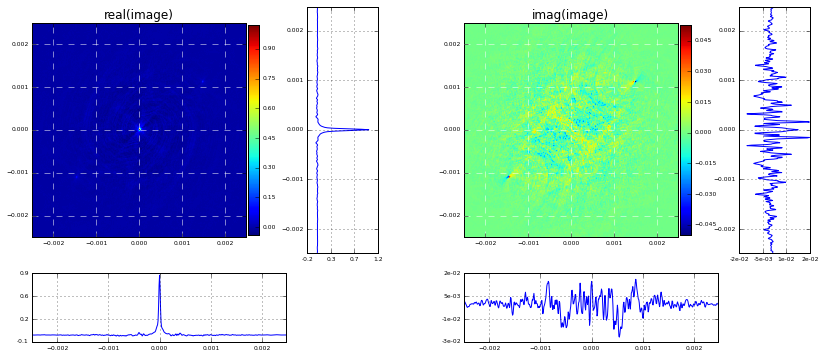

Time taken = 0.051 s [grid correction]


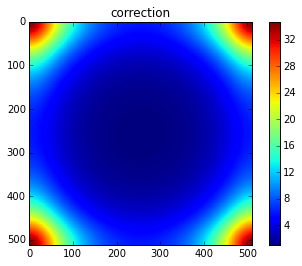

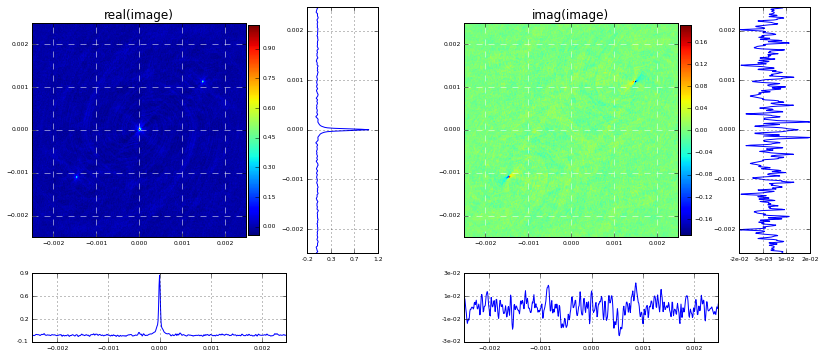

In [49]:
t0 = time.time()
image = Image(grid)
print 'Time taken = %.3f s [image fft]' % (time.time() - t0)
image.plot()
t0 = time.time()
image.grid_correct(gcf)
print 'Time taken = %.3f s [grid correction]' % (time.time() - t0)
# FIXME Correction is not working fully
# - FFT padding to generate the correction pad gcf to size of image?
# - change rounding method in gridding?
image.plot_correction()
image.plot()

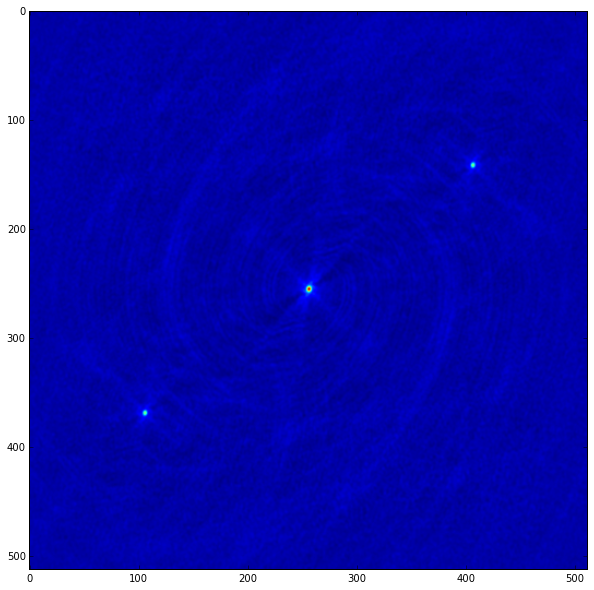

In [50]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(111)
plt.imshow(np.flipud(np.real(image.data)))

-2.00000000000016